# Laboratorio 2

## Series de tiempo

### Autores

- Angel Higueros
- Fredy Velasquez

In [5]:
# Imports necesarios.
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import numpy as np
import re
from statsmodels.tsa.arima.model import ARIMA
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.exceptions import ConvergenceWarning
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
#from arch.unitroot import PhillipsPerron
#from pmdarima import auto_arima
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
#from keras.optimizers import Adam

# 1. Analisis exploratorio

In [7]:
data = pd.read_csv('data.csv')

data

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
0,2001-01-01 00:00:00,0.00,27748.99,214581.84,0.00,0.00,0.00,0.00,194065.738095,820.00,...,0.00,0.00,0.00,0.00,0.0,566101.99,8402,0.0,715344,2.312639e+06
1,2001-02-01 00:00:00,0.00,7503.57,294609.00,0.00,0.00,0.00,0.00,170703.380952,3054.00,...,0.00,0.00,0.00,0.00,0.0,489525.80,0,0.0,370166,1.769209e+06
2,2001-03-01 00:00:00,0.00,26304.32,315263.80,0.00,0.00,0.00,0.00,161837.371429,677.00,...,0.00,0.00,0.00,0.00,0.0,575559.68,0,0.0,360530,1.945770e+06
3,2001-04-01 00:00:00,0.00,7885.89,205653.00,0.00,0.00,0.00,0.00,163048.642857,3399.00,...,0.00,0.00,0.00,0.00,0.0,437745.42,8184,0.0,359527,1.623638e+06
4,2001-05-01 00:00:00,0.00,8443.16,278371.30,0.00,0.00,0.00,0.00,171518.861905,585.00,...,0.00,0.00,0.00,0.00,0.0,552609.13,12680,0.0,723346,2.262727e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2023-01-01 00:00:00,25028.49,11654.23,132458.17,7.86,65808.97,1442099.08,45074.97,497780.690000,0.00,...,6.32,0.00,215.00,4491.66,0.0,0.00,0,0.0,0,3.718296e+06
265,2023-02-01 00:00:00,23565.09,25564.76,123451.93,152.00,154166.84,1267967.39,0.00,652984.710000,24776.42,...,248.44,870158.29,212.90,21630.09,0.0,0.00,0,0.0,0,4.577891e+06
266,2023-03-01 00:00:00,30789.61,128594.46,149590.82,NaN,66515.19,1317519.91,4985.21,711978.350000,0.00,...,330.59,249231.00,1474.00,12599.78,0.0,0.00,0,0.0,0,4.115430e+06
267,2023-04-01 00:00:00,25001.96,119761.46,134010.55,86.43,123298.87,1417182.73,21503.98,647666.300000,1840.46,...,40.00,0.00,1811.06,19941.64,0.0,0.00,0,0.0,0,4.008479e+06


In [8]:
# Muestra las primeras filas del DataFrame
print(data.head())

# Resumen estadístico de las columnas numéricas
print(data.describe())

# Información sobre el tipo de datos y valores no nulos
print(data.info())


                 Fecha  Aceites lubricantes  Asfalto      Bunker  Ceras  \
0  2001-01-01 00:00:00                  0.0  27748.99  214581.84    0.0   
1  2001-02-01 00:00:00                  0.0   7503.57  294609.00    0.0   
2  2001-03-01 00:00:00                  0.0  26304.32  315263.80    0.0   
3  2001-04-01 00:00:00                  0.0   7885.89  205653.00    0.0   
4  2001-05-01 00:00:00                  0.0   8443.16  278371.30    0.0   

   Combustible turbo jet  Diesel bajo azufre  Diesel ultra bajo azufre  \
0                    0.0                 0.0                       0.0   
1                    0.0                 0.0                       0.0   
2                    0.0                 0.0                       0.0   
3                    0.0                 0.0                       0.0   
4                    0.0                 0.0                       0.0   

   Gas licuado de petróleo  Gasolina de aviación  ...  Naftas  Petcoke  \
0            194065.738095    

### Datos faltantes

In [9]:
# Contar los valores faltantes en cada columna
print(data.isnull().sum())

# Tratar los valores faltantes (rellenarlos o eliminar filas/columnas)
data_cleaned = data.dropna()  # Elimina filas con valores faltantes


Fecha                       0
Aceites lubricantes         0
Asfalto                     0
Bunker                      0
Ceras                       1
Combustible turbo jet       0
Diesel bajo azufre          0
Diesel ultra bajo azufre    0
Gas licuado de petróleo     0
Gasolina de aviación        0
Gasolina regular            0
Gasolina superior           0
Grasas lubricantes          0
Kerosina                    0
Mezclas oleosas             0
Naftas                      0
Petcoke                     0
Petróleo crudo              0
Solventes                   0
Butano                      0
Diesel alto azufre          0
MTBE                        0
Orimulsión                  0
Petróleo reconstituido      0
Total importación           0
dtype: int64


/var/folders/h4/rlgjjv6s50z2sflx2_9bt49h0000gn/T/ipykernel_14449/3792158529.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


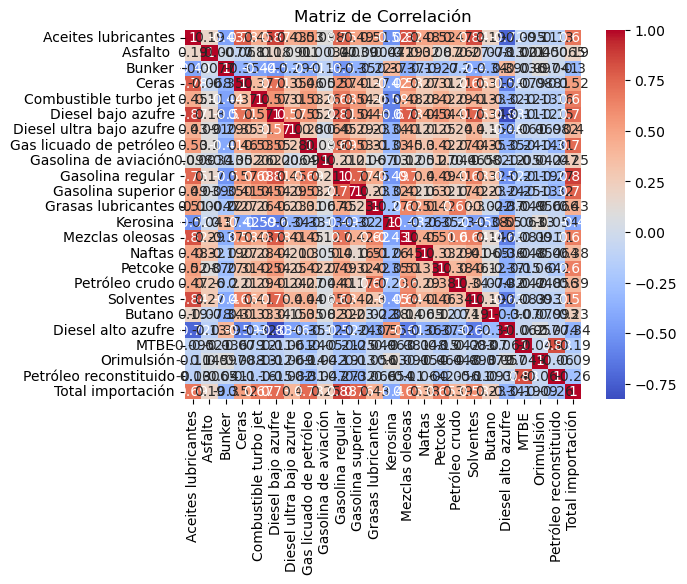

In [10]:
# Matriz de correlación para explorar relaciones lineales entre variables
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()